## K-Fold Cross Validation

### References

https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/

### Module Imports

In [28]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

### Synthetic data for classification

In [29]:
# define dataset

# NOTE: The fixed seed (random_state = 1) for the pseudorandom number generator ensures that 
# we get the same samples each time the dataset is generated.
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, n_classes=2, random_state = 1)

# dataset info
print('X:', X.shape, 'y:', y.shape)

# Let's print the first observation
print('\nX[0]:', X[0])

print('\ny[0]:', y[0])

X: (100, 20) y: (100,)

X[0]: [ 4.04836854 -2.67724481  2.11332947  2.61093054  1.34714903 -2.39341203
  0.44968979  5.32845414  0.44252193 -1.06407781 -0.73047263 -1.69107117
 -2.34955263  0.91298313 -0.09274909  1.68426984 -2.06126239  0.81752446
 -3.15597168  4.3360414 ]

y[0]: 1


### Simple logistic regression model and cross validation

In [3]:
# prepare the cross-validation procedure, which creates 10-folds with shuffled dataset.
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# let's create the model
model = LogisticRegression()

# evaluate the model with cross validation score
scores = cross_val_score(estimator=model, X = X, y = y, cv = cv)

# performance with respect to cross validation scores
print(f'Mean Accuracy = {scores.mean()} and Std of Accuracy = {scores.std()}')

Mean Accuracy = 0.85 and Std of Accuracy = 0.1284523257866513


### Sensitivity Analysis for K-Fold

What is the optimal value of K in the K-fold cross validation?

In [30]:
def get_model_performance(cv, model, X, y):
    scores = cross_val_score(estimator=model, X = X, y = y, cv = cv)
    
    mean_score = scores.mean()
    std_score = scores.std()
    min_score = scores.min()
    max_score = scores.max()
    
    return mean_score, min_score, max_score

In [45]:
# One of the computationally expensive, but more accurate estimate of the model 
# performance evaluation method is Leave-One-Out Cross Validation (LOOCV).
cv = LeaveOneOut()
model = LogisticRegression()

# Score for Leave-One-Out CV
ideal, _, _ = get_model_performance(cv, model, X, y)

In [43]:
model = LogisticRegression()

k_vals = range(2, 31)

mean_score = []
min_score = []
max_score = []

for k in k_vals:
    cv = KFold(n_splits=k, shuffle=True, random_state = 1)
    t1, t2, t3 = get_model_performance(cv = cv, model = model,  X = X, y = y)
    mean_score.append(t1)
    min_score.append(t1 - t2)
    max_score.append(t3 - t1)
    


In [39]:
mean_score

array([], dtype=float64)

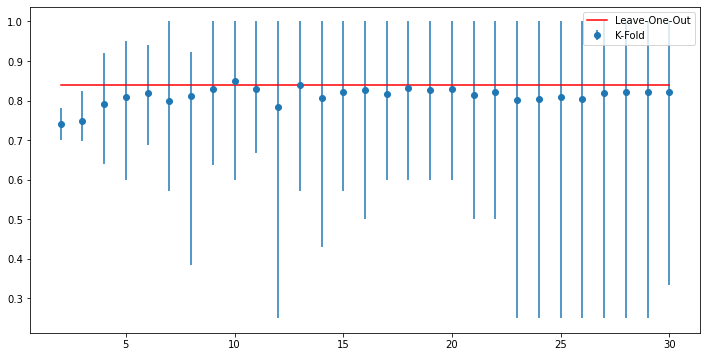

In [60]:
plt.figure(figsize = [12, 6])
plt.errorbar(x = k_vals, y = mean_score, yerr = [min_score, max_score], fmt = 'o', label = 'K-Fold')
plt.plot(k_vals, np.ones(len(list(k_vals)))*ideal, 'r', label = 'Leave-One-Out')
plt.legend()
plt.show()